In [18]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

# Import fitting functions
%run spectrometer.py

<IPython.core.display.Javascript object>


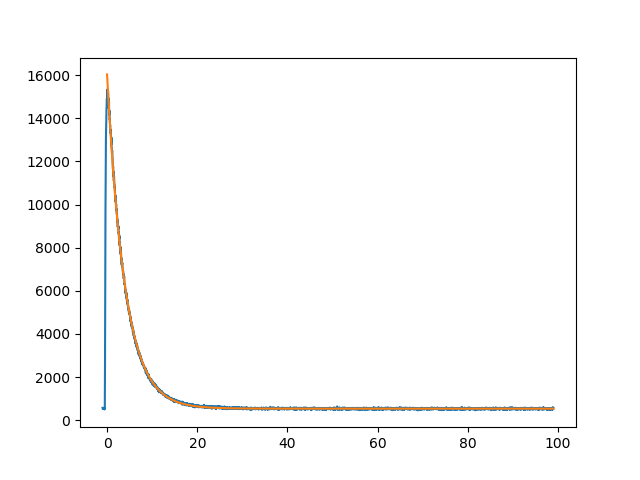

In [32]:
fn = '0.5ErTZN_tau.txt'
data = np.genfromtxt(fname=fn, delimiter='\t', dtype=float, skip_header=10, usecols=(0,1))
x = data[:,0]/1E6  # Convert time from us to ms
y = data[:,1]

# Shift x axis to account for 1ms pump time
x = shift_time(x, 1)
x_raw = x
y_raw = y
ind = np.where(x >= 0)
x = x[ind]
y = y[ind]

# Decay function to fit
def decay_fn(t, a, tau, c):
    """Single-exponential decay fluorescence function. t is the time."""
    return a * np.exp(-t / tau) + c

# Fit using Levenberg-Marquardt algorithm
from scipy.optimize import curve_fit
p0 = [max(y), 3, min(y)]
popt, pcov = curve_fit(decay_fn, x, y, p0=p0)
# Error in coefficients to 1 std.
perr = np.sqrt(np.diag(pcov))
chisq = chi2(x, y, decay_fn, popt)

fig, ax = plt.subplots()
ax.plot(x_raw, y_raw)
ax.plot(x, decay_fn(x, *popt))

In [33]:
popt

array([  1.54997270e+04,   3.97338389e+00,   5.36313495e+02])

<IPython.core.display.Javascript object>


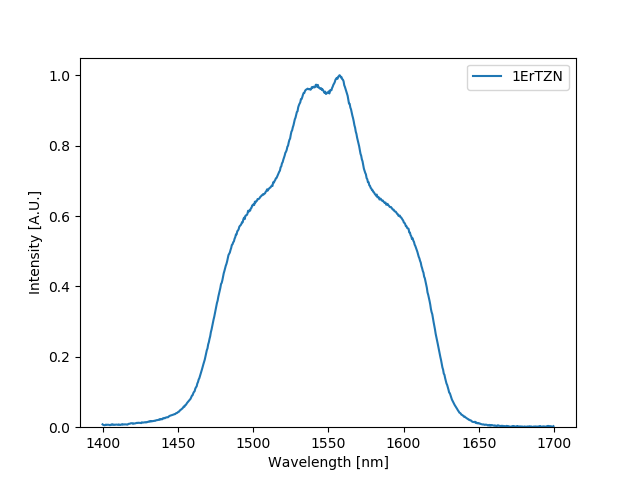

In [47]:
### USER INPUT ###
fn = '1ErTZN.txt'  # File name of .csv containing each particle area
### ---------- ###

# Begin analysis
data = np.genfromtxt(fname=fn, delimiter='\t', dtype=float, skip_header=21, usecols=(0,1))
x = data[:,0]/1E6  # Convert time from us to ms
y = data[:,1]

# Normalise intensity
y -= min(y)
y /= max(y)

fig, ax = plt.subplots()
ax.plot(x*1E6, y, label='1ErTZN')
ax.set_ylabel(r'Intensity [A.U.]')
ax.set_xlabel('Wavelength [nm]')
ax.set_ylim([0, ax.get_ylim()[1]])
ax.legend()